<a href="https://colab.research.google.com/github/doyoung1122/24-2/blob/Introduction-of-A.I/Intro_AI_2_MLE_grad_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate artifiical dataset
np.random.seed(10)
true_mu = 0.3
true_sigma = .7
data = true_mu+true_sigma*np.random.randn(1000)

In [ ]:
print(data)

[ 1.23211055e+00  8.00695282e-01 -7.81780204e-01  2.94131305e-01
  7.34935182e-01 -2.04059893e-01  4.85858110e-01  3.75983968e-01
  3.03004002e-01  1.77779853e-01  6.03118333e-01  1.14212616e+00
 -3.75545969e-01  1.01979185e+00  4.60041091e-01  6.11596329e-01
 -4.95621548e-01  3.94595815e-01  1.33917590e+00 -4.55863420e-01
 -1.08440980e+00 -9.20360607e-01  4.86249115e-01  1.96947713e+00
  1.08658388e+00  1.47083555e+00  3.69404451e-01  1.27859746e+00
  1.10126408e-01  7.29242929e-01  1.12877968e-01 -8.45163099e-02
  3.92895807e-01 -3.32994104e-02  1.21593116e+00  4.36509295e-01
  5.80146992e-01  6.36573640e-02  1.17953058e+00 -2.12378651e-01
  7.62162086e-01  5.43896760e-02 -3.57603352e-01 -4.25360518e-02
 -2.63213800e-01  1.51111653e-01  6.26018278e-02  5.18518955e-01
  6.95606869e-01  1.96805820e-01  2.81866264e-01  5.02365943e-01
 -7.79153499e-02  7.95712014e-01  8.89557317e-01  4.42506558e-01
  1.97629257e+00  9.42221256e-01  2.21409270e-01  4.64736870e-02
  1.37472421e-01 -5.12102

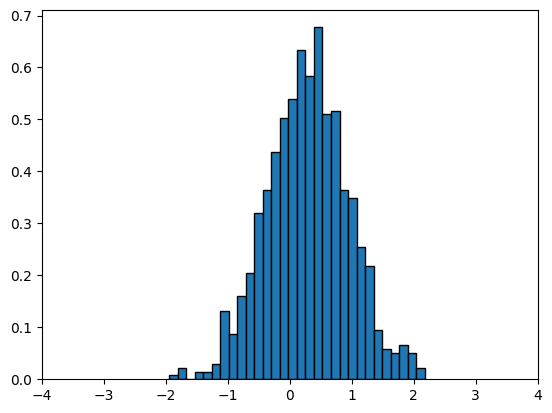

In [ ]:
# Create a histogram of the data
num_bins = 30
count, bins, _ = plt.hist(data, num_bins, density=True,
                                edgecolor='k')
plt.xlim([-4,4])  # This gives the xmin and xmax to be plotted"

plt.show()

In [ ]:
print(bins) # bins: x values

[-1.94308094 -1.80578034 -1.66847973 -1.53117913 -1.39387852 -1.25657791
 -1.11927731 -0.9819767  -0.8446761  -0.70737549 -0.57007489 -0.43277428
 -0.29547368 -0.15817307 -0.02087247  0.11642814  0.25372874  0.39102935
  0.52832995  0.66563056  0.80293116  0.94023177  1.07753237  1.21483298
  1.35213358  1.48943419  1.62673479  1.7640354   1.90133601  2.03863661
  2.17593722]


In [ ]:
print(count) # count: y values

[0.00728329 0.02184987 0.         0.01456658 0.01456658 0.02913316
 0.1310992  0.08739947 0.16023236 0.20393209 0.32046472 0.36416445
 0.43699735 0.50254695 0.53896339 0.63364615 0.58266313 0.67734589
 0.50983024 0.51711353 0.36416445 0.34959788 0.25491512 0.21849867
 0.09468276 0.05826631 0.05098302 0.0655496  0.05098302 0.02184987]


In [ ]:
def normal_pdf(xvals, mu, sigma):
  pdf_vals = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (xvals - mu)**2 / (2 * sigma**2))
  return pdf_vals

In [ ]:
mu=3
sigma = 2

In [ ]:
normal_pdf(bins, mu, sigma)

array([0.00940662, 0.01111982, 0.01308324, 0.01532096, 0.01785705,
       0.02071509, 0.02391758, 0.02748533, 0.03143676, 0.03578721,
       0.04054815, 0.04572646, 0.05132363, 0.05733507, 0.06374946,
       0.0705482 , 0.07770494, 0.08518527, 0.09294663, 0.1009383 ,
       0.10910172, 0.11737089, 0.12567313, 0.13392995, 0.14205817,
       0.14997122, 0.15758065, 0.16479767, 0.1715349 , 0.17770806,
       0.18323778])

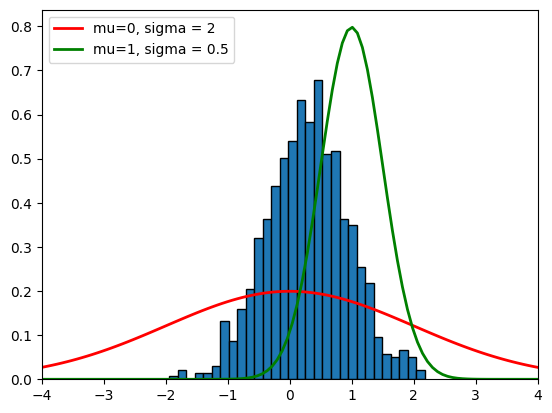

In [ ]:
num_bins = 30
count, bins, _ = plt.hist(data, num_bins, density=True,
                                edgecolor='k')
x_val = np.linspace(-4,4,100)
plt.plot(x_val, normal_pdf(x_val, mu=0, sigma=2), linewidth=2, color='r', label = 'mu=0, sigma = 2')
plt.plot(x_val, normal_pdf(x_val, mu=1, sigma=0.5), linewidth=2, color='g', label = 'mu=1, sigma = 0.5')
plt.xlim([-4,4])  # This gives the xmin and xmax to be plotted"
plt.legend()
plt.show()

In [ ]:
# Given mu and sigma, we can define a likelihood function:

mu = 3
sigma = 2

L = np.prod(normal_pdf(data, mu=mu, sigma=sigma))

print(L)

0.0


In [ ]:
# Too small value of L --> Find min. of -log(L)

In [ ]:
def nll(xvals, mu, sigma): #nll: negative log likelihood
  exponent = - (xvals - mu)**2 / (2 * sigma**2)
  neg_sum_exponent = np.sum(-exponent)

  coeff = 1/(sigma * np.sqrt(2 * np.pi))

  n_data = xvals.shape[0]
  sum_log_coeff = n_data * np.log(coeff)

  return (neg_sum_exponent - sum_log_coeff)/n_data

In [ ]:
nll(data,mu,sigma)

In [ ]:
mu = 3
sigma = 2

epsilon = 1e-7 # small value for numerical gradient
grad_mu = (nll(data,mu+epsilon,sigma)-nll(data,mu,sigma))/epsilon
grad_sigma = (nll(data,mu,sigma+epsilon)-nll(data,mu,sigma))/epsilon

In [ ]:
eta = 1e-2 # step size (or learning rate) for the gradient descent

mu_new = mu - eta * grad_mu
sigma_new = sigma - eta * grad_sigma

print(mu_new, sigma_new)
print(nll(data,mu_new,sigma_new))

In [ ]:
mu = mu_new
sigma = sigma_new

grad_mu = (nll(data,mu+epsilon,sigma)-nll(data,mu,sigma))/epsilon
grad_sigma = (nll(data,mu,sigma+epsilon)-nll(data,mu,sigma))/epsilon

mu_new = mu - eta * grad_mu
sigma_new = sigma - eta * grad_sigma

print(mu_new, sigma_new)
print(nll(data,mu_new,sigma_new))

In [ ]:
epsilon = 1e-7 # small value for numerical gradient

for i in range(1000):
  mu = mu_new
  sigma = sigma_new

  grad_mu = (nll(data,mu+epsilon,sigma)-nll(data,mu,sigma))/epsilon
  grad_sigma = (nll(data,mu,sigma+epsilon)-nll(data,mu,sigma))/epsilon

  mu_new = mu - eta * grad_mu
  sigma_new = sigma - eta * grad_sigma
  print(nll(data,mu,sigma))
  #print(mu_new, sigma_new)

In [ ]:
mu_new

In [ ]:
sigma_new

In [ ]:
num_bins = 30
count, bins, _ = plt.hist(data, num_bins, density=True,
                                edgecolor='k')
plt.plot(bins, normal_pdf(bins, mu=mu, sigma=sigma), linewidth=2, color='r')
plt.xlim([-4, 4])
plt.show()